#Machine learning Project

#Student : Tariq

#Teacher : Felix

#instructor: Hannas


#Question i am trying to answer:

Can I use the features such as Animal Age, Animal Gender, Animal Name, Animal Breed, and Animal Type to predict whether an animal will be adopted?

In [ ]:
import numpy as np
from sklearn.metrics import f1_score
import pandas as pd
import pickle
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from pprint import pprint
from wordcloud import WordCloud
from IPython.display import Image
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier



In [ ]:
df = pd.read_csv('train.csv')
df['OutcomeType']=df['OutcomeType']=='Adoption'
df["Color"]= df['Color'].replace('/', ' ', regex=True)


#######################################################################
df=df.drop('DateTime',axis=1)    ##Features i have been asked to remove
df=df.drop('OutcomeSubtype',axis=1)
df=df.drop('AnimalID',axis=1)
#######################################################################


X_train, X_test =train_test_split(df, test_size=0.35,random_state=42)




We had Five classes i took only Adoption


Reasons:
I found it impractical to predict classes when I have an even smaller number of features available.
#I have been asked to drop  the feature



DataTime
OutCome subtype
Animal Id                    




for different reasons :: Mainly to get reduce the    |accuarcy score|


Here, we are dividing the data to ensure maximum separation for effective feature handling.without manipulating the data

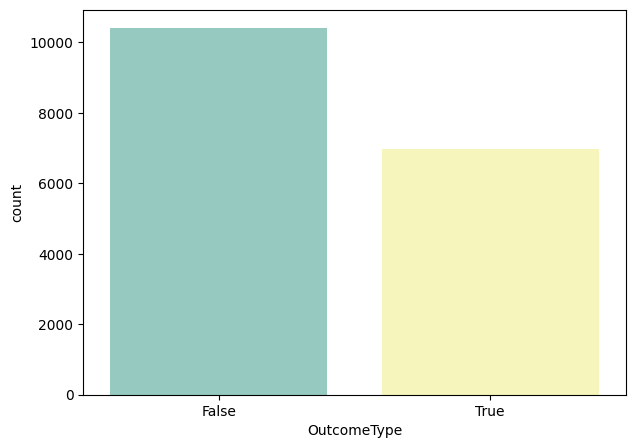

In [ ]:
plt.figure(figsize=(7, 5))
_ = sns.countplot(data=X_train, x='OutcomeType', palette='Set3')

#Implanced Dataset:

In the full dataset, there were originally 26,000 samples. For the purposes of our analysis, we have randomly selected a subset for X_train, which we are using to create plots.

One key observation is that the number of animals that have not been adopted significantly outweighs the number of animals that have found homes. This dataset exhibits class imbalance, where one class (not adopted) is much more prevalent than the other (adopted).


***Feature handeling  :***


In [ ]:
def Animal_is_Named(DataFrame):
  DataFrame["Name"]=DataFrame['Name'].fillna('NoName')
  DataFrame["Name"]=DataFrame["Name"]!='NoName'


Animal_is_Named(X_train)
Animal_is_Named(X_test)

This part of the process checks whether an animal has a name or not. It does so by filling any missing values with "NoName." Afterward, it evaluates whether the animal's name is "NoName." If it's "False," it means there is no a name, and if it's "True," it indicates that the animal is named.

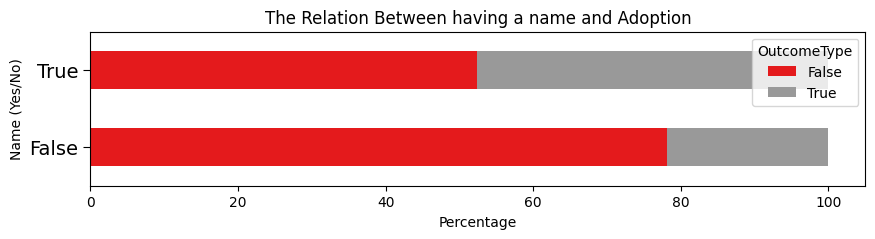

In [ ]:
counts = X_train.groupby('Name')['OutcomeType'].value_counts(normalize=True).mul(100).unstack()

counts.plot.barh(stacked=True, colormap='Set1', figsize=(10, 2))
plt.xlabel('Percentage')
plt.ylabel('Name (Yes/No)')
plt.title('The Relation Between having a name and Adoption')
plt.tick_params(axis='y', which='major', labelsize=14, labelrotation=0, length=5)
plt.show();


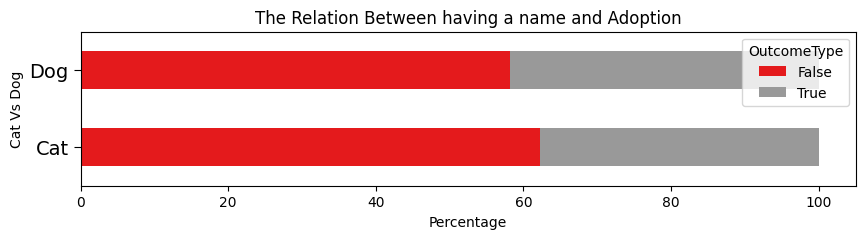

In [ ]:
counts = X_train.groupby('AnimalType')['OutcomeType'].value_counts(normalize=True).mul(100).unstack()

counts.plot.barh(stacked=True, colormap='Set1', figsize=(10, 2))
plt.xlabel('Percentage')
plt.ylabel('Cat Vs Dog')
plt.title('The Relation Between having a name and Adoption')
plt.tick_params(axis='y', which='major', labelsize=14, labelrotation=0, length=5)
plt.show();

In [ ]:
X_train["AnimalType"]=X_train['AnimalType']=='Cat'
X_test["AnimalType"]=X_test['AnimalType']=='Cat'


In simple terms, to check if an animal is a cat, we just look at its "animal type." If it says "cat," it's true (it's a cat); if it says anything else, it's false (it's not a cat, it's a dog).

In [ ]:
def AnimalType_Named(DataFrame):
  Condition=(DataFrame["AnimalType"]==False)&(DataFrame["Name"]==True)
  DataFrame["Named_Dog"]=(DataFrame["AnimalType"]==False)&(DataFrame["Name"]==True)
  DataFrame["Named_Cat"]=(DataFrame["AnimalType"]==True)&(DataFrame["Name"]==True)

AnimalType_Named(X_train)
AnimalType_Named(X_test)

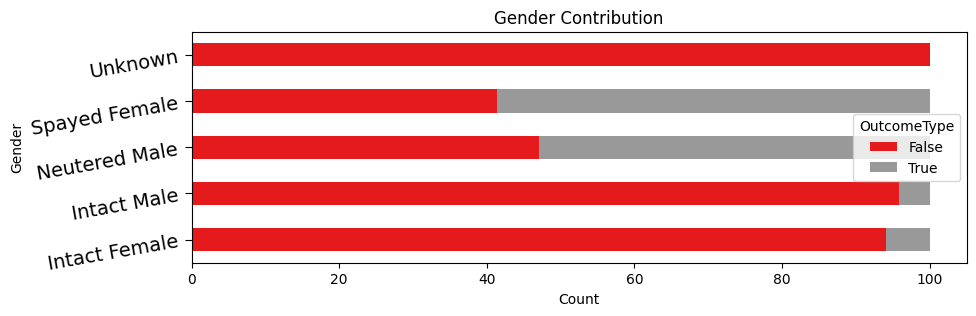

In [ ]:
counts = X_train.groupby('SexuponOutcome')['OutcomeType'].value_counts(normalize=True).mul(100).unstack()

counts.plot.barh(stacked=True, colormap='Set1', figsize=(10, 3))  # figsize here has effect
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Gender Contribution')
plt.tick_params(axis='y', which='major', labelsize=14, labelrotation=10, length=5)
plt.show();

In [ ]:

def Gender_converting(Data_Frame):
  Data_Frame['Male'] = Data_Frame['SexuponOutcome'].str.contains('Male').astype(bool)
  Data_Frame['intact']=Data_Frame['SexuponOutcome'].str.contains("Intact").astype(bool)
  Data_Frame['Unknown']=Data_Frame['SexuponOutcome'].str.contains("Unknown").astype(bool)
  Data_Frame['Spayed']=Data_Frame['SexuponOutcome'].str.contains("Spayed").astype(bool)
  Data_Frame['Neutered']=Data_Frame['SexuponOutcome'].str.contains("Neutered").astype(bool)
  return Data_Frame

X_train=Gender_converting(X_train)
X_test=Gender_converting(X_test)



X_train=X_train.drop("SexuponOutcome",axis=True)
X_test=X_test.drop("SexuponOutcome",axis=True)

The gender have been divided into five features:

Male , Intact , Spayed , Neutered , Unknown

It have been handeled by looking if the sample satisfy the string of the feature

Example:
Neutered Male We have  in the String Male
Then Male : 1 and we have neutered : 1 And everything else is going to be zero

Male : 1 , Intact : 0 , Spayed : 0 ,Neutered : 1 ,Unknown : 0

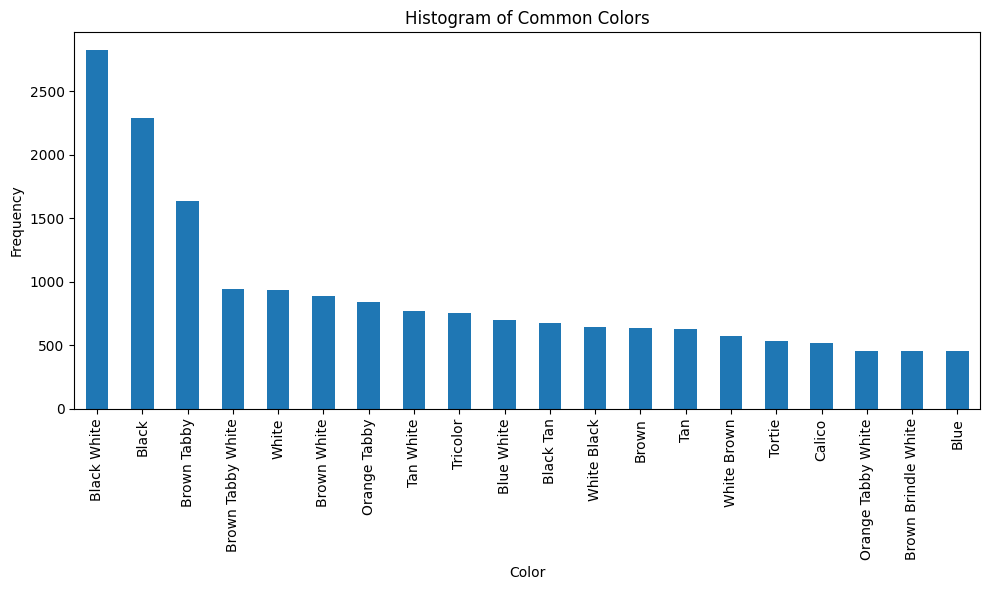

In [ ]:
value_counts = df["Color"].value_counts()[:20]
value_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel("Color")
plt.ylabel('Frequency')
plt.title(f'Histogram of {"Common Colors"}')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

def Common_Colors(DataFrame):
  common_breeds = X_train["Color"].value_counts()[40:]
  common_breeds = common_breeds.index.tolist()
  X_train['Color'] = X_train['Color'].replace(common_breeds, 'others')
  X_test['Color'] = X_test['Color'].replace(common_breeds, 'others')

Common_Colors(X_train)




def extract_unique_colors(data_frame):
    data_frame["Color"] = data_frame['Color'].replace('/', ' ', regex=True)
    color_list = data_frame["Color"].str.split().explode()
    unique_colors = np.unique(color_list)
    return list(unique_colors)



In [ ]:

def Color_Converting(DataFrame,train_Set):

  Possible_Colors=extract_unique_colors(train_Set)

  DataFrame["Color"]=DataFrame['Color'].replace('/', ' ', regex=True)

  Color_row=list()
  for i in DataFrame['Color']:
    i = np.array(i.split(' '))
    indices = np.where(np.isin(Possible_Colors,i))
    Color_row.append(indices)


  Matrix=np.zeros((len(DataFrame["Color"]),len(Possible_Colors)))

  for i in range(len(DataFrame["Color"])):
    Matrix[i][Color_row[i]]=1

  Matrix=Matrix.T


  for Counter, Colors in enumerate(Possible_Colors):
    DataFrame[Colors]=Matrix[Counter]

Color_Converting(X_train,X_train)
Color_Converting(X_test,X_train)


In [ ]:
X_train=X_train.drop("Color",axis=True)
X_test=X_test.drop("Color",axis=True)

Three hundred colors were present; as a result, not all of them were included. Instead, the fifty most common colors were considered, and everything else was transferred into the "other" category.
Yet, due to the large number of colors, they were transformed into the one-hot encoding format.  
       Example :
set of colors :Black, White , Red
A black and white dog is considered.
Result: Black - 1, White - 1, Red - 0


in terms of the explanation the color feature was one of the hardest features that have been used yet


the summary is that :


An array have been defined in order to capture color in a way that :



A=[‘Black’,’White’,’Red’]


each color represents the column that it will be presenting the Color in the matrix


Then the color of the animal have been looked in that array such that the index where the color is will be where the matrix should be transferred into One and everything else will be zero




Summary : We are trying to make one hot encoding in order to present the colors in a simple way for the machine learning module to understand


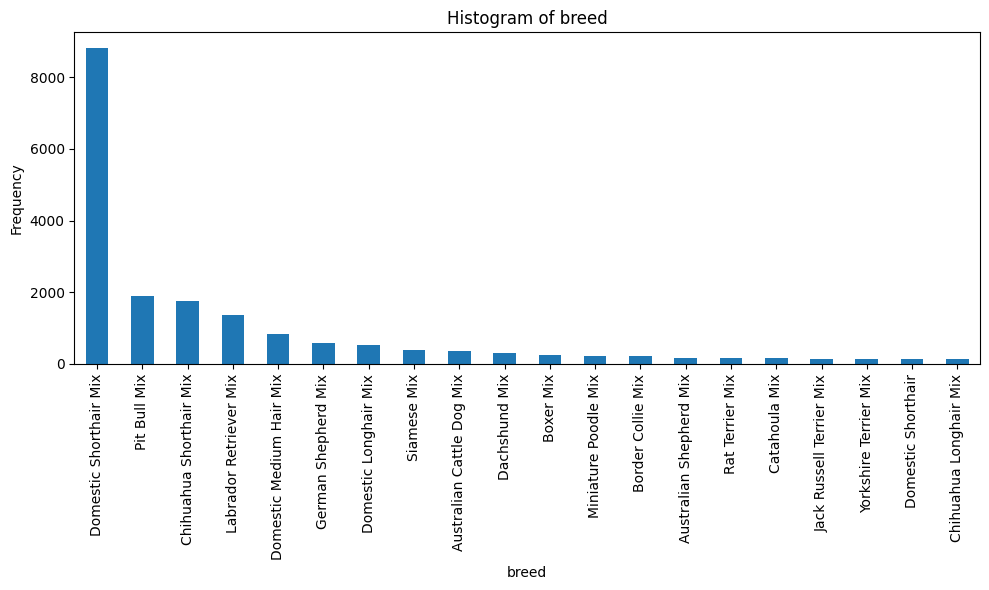

In [ ]:
value_counts = df["Breed"].value_counts()[:20]
value_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel("breed")
plt.ylabel('Frequency')
plt.title(f'Histogram of {"breed"}')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The Breed Feature have been transformed into the OnehotEncoding and this in order to clear up the realtions between the feature and the Outcome the we are trying to predict


#The Breed Feature

So, basically, I have two types of dogs in my dataset: Boxer Dogs and Pitbull Dogs. Instead of using one-hot encoding, I have created two separate features:

"I have a "Pitbull" feature: This feature is set to "true" if the dog is a Pitbull and "false" if it's not.
I also have a "Boxer" feature: This feature is set to "true" if the dog is a Boxer and "false" if it's not.
So, if I have a Pitbull, I set "Pitbull" to "true" and "Boxer" to "false," and vice versa for Boxer Dogs. This way, I represent the breed of the dog using these two binary features instead of a one-hot encoding with multiple columns.


If you are confused by the implmentation its exactly like the color implmentation in the first project

In [ ]:




X_train=X_train.dropna(subset=['AgeuponOutcome'])
X_test=X_test.dropna(subset=['AgeuponOutcome'])



def age_converter(row):
    age_string = row['AgeuponOutcome']
    [age,unit] = age_string.split(" ")
    unit = unit.lower()
    if("day" in unit):
        if age=='0': return 1
        return int(age)
    if("week" in unit):
        if(age)=='0': return 7
        return int(age)*7
    elif("month" in unit):
        if(age)=='0': return 30
        return int(age) *30
    elif("year" in unit):
        if(age)=='0': return  365
        return int(age) *365





X_train['Age numeric'] = X_train.apply(age_converter, axis=1)
X_test['Age numeric'] = X_test.apply(age_converter, axis=1)


X_train = X_train.drop('AgeuponOutcome', axis=True)
X_test = X_test.drop('AgeuponOutcome', axis=True)

<ipython-input-31-71cc6408344d>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age numeric'] = X_train.apply(age_converter, axis=1)


age came as : (int: quantity ,string:unit): example(1,year)
I transferred the unit into its daily presentation:{year : 365,month:30,week:7,day :1}
so
basically it’s transferring the unit into it’s daily presentation and then multiplying it by the quantity

example: 1 year   =  1 * 365

from the age we can see that sometimes there is (0,unit) example (0,years) therefore we can conclude that there might be a lot of problems that are not shown in the data set
the problem have been fixed by if we have (0,unit) then (1*unit) example (0,years)=1**365


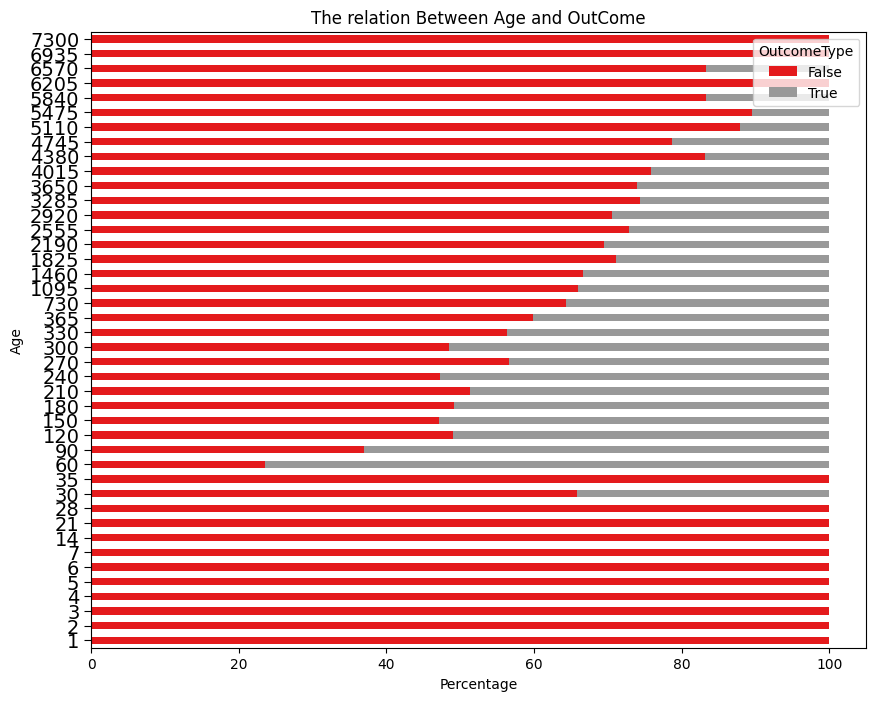

In [ ]:
counts = X_train.groupby('Age numeric')['OutcomeType'].value_counts(normalize=True).mul(100).unstack()

counts.plot.barh(stacked=True, colormap='Set1', figsize=(10, 8))
plt.xlabel('Percentage')
plt.ylabel('Age')
plt.title('The relation Between Age and OutCome')
plt.tick_params(axis='y', which='major', labelsize=14, labelrotation=0, length=5)
plt.show();

In [ ]:

def Categorizing_Age (DataFrame):
  DataFrame['Child_Age']=DataFrame['Age numeric']<35
  DataFrame['Young_Age']=(DataFrame['Age numeric']<365)&(DataFrame["Age numeric"]>35)
  DataFrame['Age_Year']=DataFrame['Age numeric']==365
  DataFrame['Age is Greater']=DataFrame['Age numeric']>365

Categorizing_Age(X_train)
Categorizing_Age(X_test)

I have categorized the Age into categories and this to consider and heighlight the Age diffrences between animals so the machine learning module can understand the differences between different categories

by categorizing data based on age, the machine learning module is essentially identifying patterns and distinctions between the age categories rather than attempting to learn the specific differences between individual ages. This simplification allows the model to focus on broader trends and relationships within each category, leading to more efficient and effective predictions or classifications based on age-related data. This approach enhances the model's generalization capabilities, making it better equipped to handle new, unseen data, and it also facilitates the generation of more interpretable and actionable insights.

By putting data into categories, we're showing which groups have a strong link to the outcome type. This makes it clear that the machine learning model is likely to predict non-adoption for ages between 1 and 35. and a better chance of adoption for age 60 and above

In [ ]:
y_train=X_train.pop("OutcomeType")
y_test=X_test.pop("OutcomeType")

In [ ]:
from sklearn.preprocessing import LabelEncoder
import bisect


label_encoder = LabelEncoder()
X_train["Breed_encoded"] = label_encoder.fit_transform(X_train["Breed"])

label_classes = label_encoder.classes_.tolist()

def Test_Breed_Encoder(row,label_classes):
  breed=row["Breed"]
  if breed in label_classes:
    return breed
  else:
    return 'Other'









X_test["Breed"] = X_test.apply(Test_Breed_Encoder, args=(label_classes,), axis=1)
label_classes.append("Other")

label_encoder.classes_=np.array(label_classes)

X_test["Breed_encoded"] = label_encoder.transform(X_test["Breed"])


X_test=X_test.drop("Breed",axis=True)
X_train=X_train.drop("Breed",axis=True)


Best Parameters :  {'classifier__class_weight': {0: 1, 1: 0.85}, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}


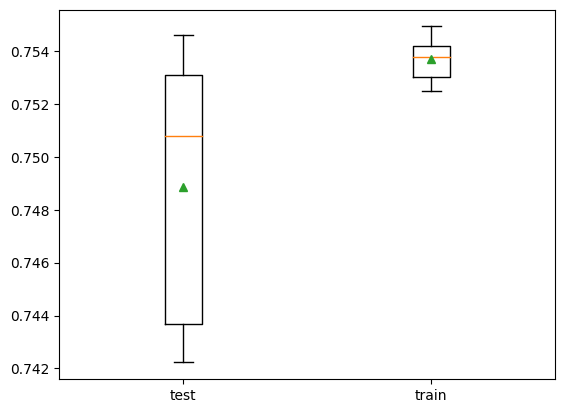

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.compose import ColumnTransformer

log_reg = LogisticRegression(max_iter=3000)

one_hot=OneHotEncoder(sparse_output=True,handle_unknown='ignore',max_categories=40)




One_Hot_Encoding = make_column_transformer(
    (one_hot, ["Breed_encoded"]),
    remainder="passthrough"
)

pipe = imbpipeline([
    ('preprocessor', One_Hot_Encoding),
    ('scaler', StandardScaler()),
    (('sample',SMOTE(random_state=42, k_neighbors=3))),
    ('classifier', log_reg)
])

parameters = {
  "classifier__class_weight": [{0: 1, 1: 0.8}, {0: 1, 1: 0.85}, {0: 1, 1: 0.75}, {0: 1, 1: 0.83}],
  'classifier__solver': ['saga', 'lbfgs'],
  'classifier__penalty': ['l2', None]
}
grid_search = GridSearchCV(pipe, parameters, cv=2,scoring="f1")

grid_search.fit(X_train, y_train)

Logistic_regression_best_parameters = grid_search.best_params_
print("Best Parameters : ",Logistic_regression_best_parameters)

Logistic_regression_best_moduel=grid_search.best_estimator_



scores = cross_validate(Logistic_regression_best_moduel, X_train, y_train, return_train_score='f1_score',cv=5)
test_accuracy=scores["test_score"]
train_accuracy=scores["train_score"]

plt.boxplot([test_accuracy, train_accuracy], labels=["test", "train"], showmeans=True)
plt.show()

#Standard scaling
is a helpful technique in machine learning because it transforms features into a common format, making them comparable. This normalization reduces bias that could arise when some features have larger values than others, ensuring fair treatment for all features.
#Smote Function
Smote is a tool that allow us to balance the classes inside the dataset and it works by:

1) Identify Minority Class: Identify the minority class, the one with fewer instances in the dataset.

2) Discover Common Feature Values: Find common feature values within the minority class, revealing its characteristic patterns.

3) Generate Synthetic Samples: Create synthetic samples based on these common feature values to represent the minority class more effectively.

4) Check Neighboring Samples: Ensure that the synthetic samples fit within the neighborhood of the minority class by comparing them to nearby instances.

Balance Classes: By following these steps, you balance the class distribution, resulting in a more balanced dataset, which can enhance the performance of machine learning models, particularly in cases with class imbalance.


#LBFG Solver
LBFG Solver is a way to fasten the proccess of minmising the loss function

How it works:
1)It tries to minmise the loss function by computing both the First derivative and the second derivative

It uses the approach that if we have a positive value in the first derivative and the second derivative have a positive value then it will try to minmise the learning rate because we are going to the direction where the loss function will get into 0 and if the first derivative is less than zero yet the function is decreasing then we will try to increase the learning rate in order to arrive to the root faster


#F1 Score:
F1 Score is a very standart thing to use in order to compute an implanced data set and this is becaise it combines both recall and precession  

The true meaning of F1 is basically from the classes that we got how precise we were at identfying them

And this means that we are taking the miniority class into our consderation this time


Logistic Regression is like a decision-making tool for yes-or-no questions. It uses a special math formula that takes information and gives you a number between 0 and 1.

If the number is close to 1, it says "Yes, it's a 'Yes' answer."
If the number is close to 0, it says "No, it's a 'No' answer."

So, it helps us decide whether something belongs to one group or another based on the information we have. It's like asking a very smart friend for advice, and they give you a number that helps you make a clear decision.


Most importantly it uses some loss function and after using the loss function it tries to minmise the loss function by using the  gradient decent method to compute better coefficents

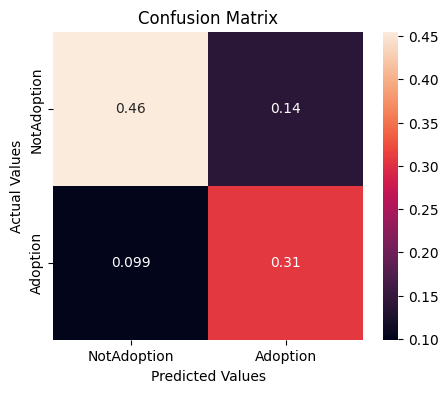

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Logistic_regression_best_moduel.fit(X_train,y_train)
y_hat = Logistic_regression_best_moduel.predict(X_test)


cm = confusion_matrix(y_test, y_hat)

cm_df = pd.DataFrame(cm,
                     index =["NotAdoption","Adoption"],columns = ["NotAdoption","Adoption"])
plt.figure(figsize=(5,4))


sns.heatmap(cm_df / len(X_test), annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
f1_Score=f1_score(y_test, y_hat)
accuarcy_Score=accuracy_score(y_test, y_hat)
print("F1 Score : ",f1_Score,",","Accuarcy Score : ",accuarcy_Score)

F1 Score :  0.7209535759096611 , Accuarcy Score :  0.7622153319790441


Best Parameters :  {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 750}


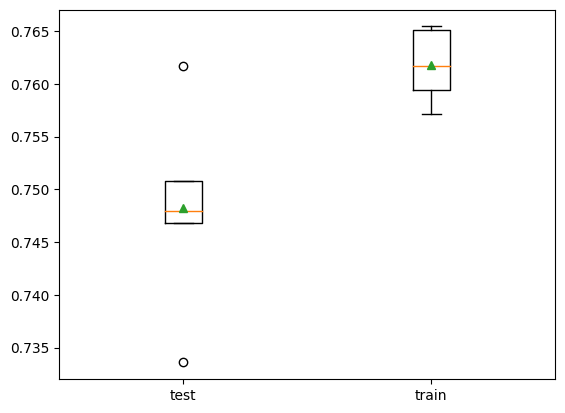

In [ ]:
from sklearn.preprocessing import MinMaxScaler

One_Hot_Encoding = make_column_transformer(
    (one_hot, ["Breed_encoded"]),
    remainder="passthrough"
)



pipeline = imbpipeline([
    ('preprocessor', One_Hot_Encoding),
    ('scaler', StandardScaler()),
    (('sample',SMOTE(random_state=42, k_neighbors=3))),
    ('classifier', GradientBoostingClassifier(random_state=42,n_iter_no_change=5))])




parameters = {
    "classifier__n_estimators": [500,750,1000],
    "classifier__learning_rate": [0.01, 0.05],
    "classifier__max_depth": [5,10,15,20],
    "classifier__min_samples_split": [4,3],
    "classifier__min_samples_leaf": [3,4],
}

grid_search = GridSearchCV(pipeline, parameters, cv=2,scoring="f1",n_jobs=-1)

grid_search.fit(X_train, y_train)

Gradient_tree_best_parameters = grid_search.best_params_
print("Best Parameters : ",Gradient_tree_best_parameters)
Gradient_tree_best_module=grid_search.best_estimator_


scores = cross_validate(Gradient_tree_best_module, X_train, y_train, return_train_score="f1_score",cv=5)
Gradient_tree_best_module.fit(X_train,y_train)
test_accuarcy=scores["test_score"]
train_accuarcy=scores["train_score"]



plt.boxplot([test_accuarcy, train_accuarcy], labels=["test", "train"], showmeans=True)
plt.show()

Gradient Boosting Classifier

It works making simple leaf for example let's say a random leaf that always say either True Or False "Basically a Constant"
Then it looks at the error that is coming from these predictions by using a certian loss function like the log loss

then it tires to classify the classes that have not been correctly classified by moving toward the direction that reduces the loss function the most in the next tree

By adding all the trees together we will obtain a tree that can classify things correctly


Note:
The choice of parameters haven't been at random and this is because i didnt want to tune the machine learning module manually


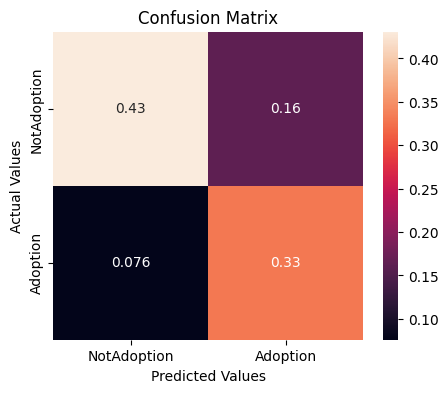

In [ ]:
Gradient_tree_best_module.fit(X_train,y_train)
y_hat = Gradient_tree_best_module.predict(X_test)



cm = confusion_matrix(y_test, y_hat)

cm_df = pd.DataFrame(cm,
                     index =["NotAdoption","Adoption"],columns = ["NotAdoption","Adoption"])
plt.figure(figsize=(5,4))

sns.heatmap(cm_df / len(X_test), annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
f1_Score=f1_score(y_test, y_hat)
accuarcy_Score=accuracy_score(y_test, y_hat)
print("F1 Score : ",f1_Score,",","Accuarcy Score : ",accuarcy_Score)

F1 Score :  0.7340387587682796 , Accuarcy Score :  0.7608254036138138


Under We have a Confusion matrix that explains how much a feature is important in order to make a prediction for the machine learning module


Random Forest uses a group of decision trees that analyze data independently. Each tree is trained on a random subset of data and features, which adds diversity. They might be a bit biased, but they all vote on the prediction. The majority vote leads to a more reliable and balanced final prediction, combining the strengths of individual trees

Example:
Imagine a scenario where a decision needs to be made about increasing military expenses. The general supports the idea
Religious leaders oppose it
The high-tech industry is also against it
The economy shows resistance as well
In this case, individuals from diverse backgrounds collaborate to reach a collective decision, which is determined by a majority vote. Therefore, people with different experiences come together to make a decision collectively, ultimately relying on a majority consensus


Best Parameters :  {'classifier__class_weight': {0: 1, 1: 0.86}, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 1500}


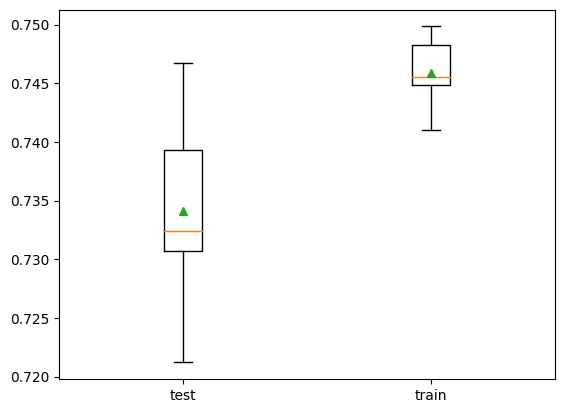

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

pipeline = imbpipeline([
    ('preprocessor', One_Hot_Encoding),
    ('scaler', StandardScaler()),
    (('sample',SMOTE(random_state=42, k_neighbors=3))),
    ('classifier',RandomForestClassifier(random_state=42))])




parameters = {
    "classifier__n_estimators": [1250,1500],
    "classifier__max_depth": [4,6,8,10],
    "classifier__min_samples_split": [2, 3 ,4],
    "classifier__min_samples_leaf": [3,4],
    "classifier__class_weight": [{0: 1, 1: 0.86}, {0: 1, 1: 0.84}, {0:1, 1: 0.82}]
}

grid_search = GridSearchCV(pipeline, parameters, cv=2, scoring="f1",n_jobs=-1)

grid_search.fit(X_train, y_train)



Random_forest_best_parameters = grid_search.best_params_
print("Best Parameters : ",Random_forest_best_parameters)
Random_forest_best_moduel=grid_search.best_estimator_

scores = cross_validate(Random_forest_best_moduel, X_train, y_train, return_train_score="f1_score",cv=5)
test_accuarcy=scores["test_score"]
train_accuarcy=scores["train_score"]



plt.boxplot([test_accuarcy, train_accuarcy], labels=["test", "train"], showmeans=True)
plt.show()

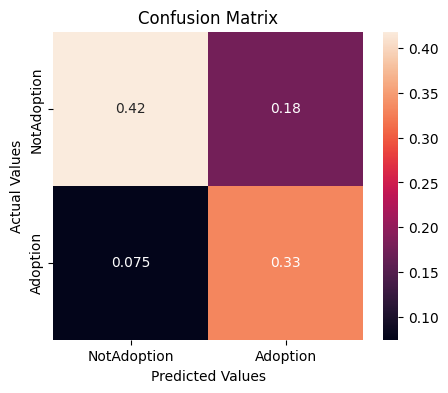

In [ ]:
y_hat = Random_forest_best_moduel.predict(X_test)


cm = confusion_matrix(y_test, y_hat)

cm_df = pd.DataFrame(cm,
                     index =["NotAdoption","Adoption"],columns = ["NotAdoption","Adoption"])
plt.figure(figsize=(5,4))

sns.heatmap(cm_df / len(X_test), annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
f1_Score=f1_score(y_test, y_hat)
accuarcy_Score=accuracy_score(y_test, y_hat)
print("F1 Score : ",f1_Score,",","Accuarcy Score : ",accuarcy_Score)

F1 Score :  0.704107744107744 , Accuarcy Score :  0.7651021062760611


kneighborsclassifier its looking at features that our sample have and it tryies to identify it by looking at the other samples and which feature values they have

Using a certain metric we try to know how far the samples are from the our sample that we are trying to identify

in order to set a good estimate in how similar our sample to the other samples we can look how the other samples are far away from it and this what weight does there

Best Parameters :  {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 15, 'classifier__weights': 'uniform'}


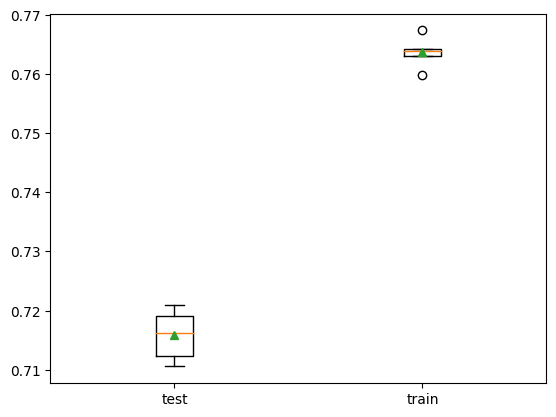

In [ ]:
from sklearn.compose import make_column_transformer


One_Hot_Encoding = make_column_transformer(
    (one_hot, ["Breed_encoded"]),
    remainder="passthrough"
)



pipeline = imbpipeline([
    ('preprocessor', One_Hot_Encoding),
    ('scaler', StandardScaler()),
    (('sample',SMOTE(random_state=42, k_neighbors=3))),
    ('classifier', KNeighborsClassifier())])


param_grid = {
    'classifier__n_neighbors': [7,9,12,15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan'],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=2,scoring="f1",n_jobs=-1)


grid_search.fit(X_train, y_train)


K_nearest_neighboor_best_parameters = grid_search.best_params_

print("Best Parameters : ",K_nearest_neighboor_best_parameters)
K_nearest_neighboor_best_module=grid_search.best_estimator_


scores = cross_validate(K_nearest_neighboor_best_module, X_train, y_train, return_train_score="f1_score",cv=5)

test_accuarcy=scores["test_score"]
train_accuarcy=scores["train_score"]



plt.boxplot([test_accuarcy, train_accuarcy], labels=["test", "train"], showmeans=True)
plt.show()

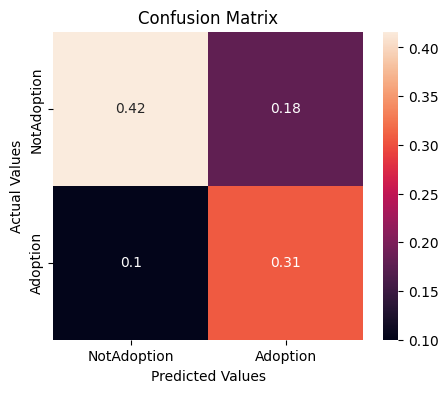

In [ ]:
K_nearest_neighboor_best_module.fit(X_train,y_train)
y_hat = K_nearest_neighboor_best_module.predict(X_test)


cm = confusion_matrix(y_test, y_hat)

cm_df = pd.DataFrame(cm,
                     index =["NotAdoption","Adoption"],columns = ["NotAdoption","Adoption"])
plt.figure(figsize=(5,4))

sns.heatmap(cm_df / len(X_test), annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
f1_Score=f1_score(y_test, y_hat)
accuarcy_Score=accuracy_score(y_test, y_hat)
print("F1 Score : ",f1_Score,",","Accuarcy Score : ",accuarcy_Score)

F1 Score :  0.6880480480480481 , Accuarcy Score :  0.7223350796535871


Here i have been asked by the teacher to make an example where the machine learning module dosn't use the Feature Age since it's an important feature

Therefore i have made a simple Function in order to drop the Age Feature and the Feature engneering that have provided one of the most important features Age Between 35 - 365


In [ ]:
Counter=0
Index_List=list()
Feature_Names=X_train.columns
for Feature_name in Feature_Names:
  Feature_name=Feature_name.split(' ')
  if "Age" in Feature_name:
    Index_List.append(Counter)

  Counter +=1


def Age_Feature_Remove(DataFrame,Feature_Index):
  DataFrame=DataFrame.drop(DataFrame.columns[Feature_Index],axis=1)
  return DataFrame
X_train=Age_Feature_Remove(X_train,Index_List)

X_test=Age_Feature_Remove(X_test,Index_List)

#K Nearest Neighboor

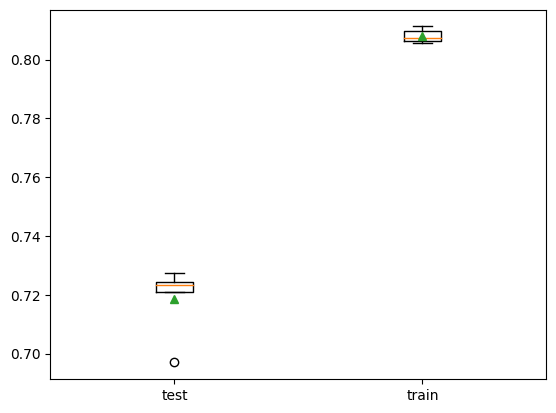

In [ ]:
pipeline = imbpipeline([
    ('preprocessor', One_Hot_Encoding),
    ('scaler', StandardScaler()),
    (('sample',SMOTE(random_state=42, k_neighbors=3))),
    ('classifier', KNeighborsClassifier(metric='manhattan', n_neighbors= 7, weights= 'distance'))])


scores = cross_validate(pipeline, X_train, y_train, return_train_score="f1_score",cv=5)

test_accuarcy=scores["test_score"]
train_accuarcy=scores["train_score"]



plt.boxplot([test_accuarcy, train_accuarcy], labels=["test", "train"], showmeans=True)
plt.show()

pipeline.fit(X_train,y_train)
y_hat=pipeline.predict(X_test)


from sklearn.metrics import accuracy_score


In [ ]:
f1_Score=f1_score(y_test, y_hat)
accuarcy_Score=accuracy_score(y_test, y_hat)
print("F1 Score : ",f1_Score,",","Accuarcy Score : ",accuarcy_Score)

F1 Score :  0.6574432761483121 , Accuarcy Score :  0.7352721052068855


#Random forest

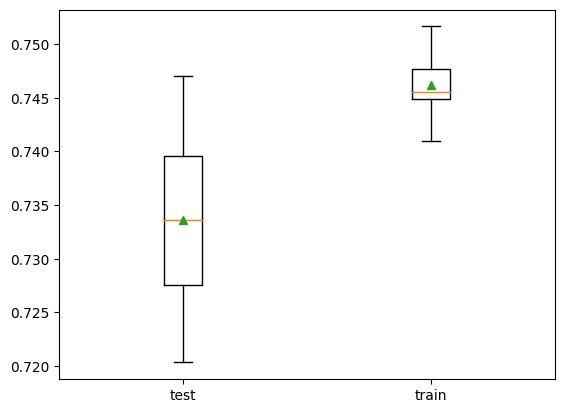

In [ ]:
pipeline = imbpipeline([
    ('preprocessor', One_Hot_Encoding),
    ('scaler', StandardScaler()),
    ('sample', SMOTE(random_state=42, k_neighbors=3)),
    ('classifier', RandomForestClassifier(class_weight={0: 1, 1: 0.86}, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=1500))
])

scores = cross_validate(pipeline, X_train, y_train, return_train_score="f1_score",cv=5)

test_accuarcy=scores["test_score"]
train_accuarcy=scores["train_score"]



plt.boxplot([test_accuarcy, train_accuarcy], labels=["test", "train"], showmeans=True)
plt.show()

pipeline.fit(X_train,y_train)
y_hat=pipeline.predict(X_test)




In [ ]:
f1_Score=f1_score(y_test, y_hat)
accuarcy_Score=accuracy_score(y_test, y_hat)
print("F1 Score : ",f1_Score,",","Accuarcy Score : ",accuarcy_Score)

F1 Score :  0.7252104770813846 , Accuarcy Score :  0.7487437185929648


Gradient Boosting Classifier

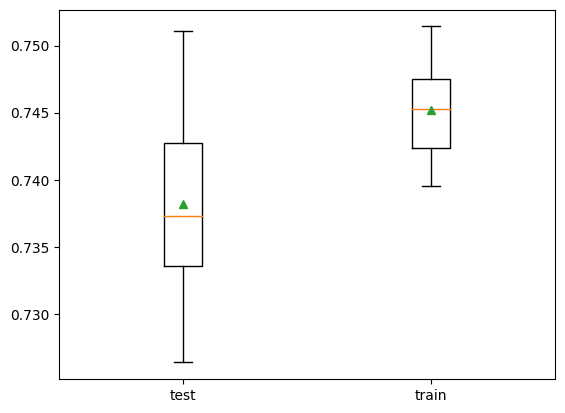

In [ ]:

pipeline = imbpipeline([
    ('preprocessor', One_Hot_Encoding),
    ('scaler', StandardScaler()),
    (('sample',SMOTE(random_state=42, k_neighbors=3))),
    ('classifier', GradientBoostingClassifier(random_state=42,n_iter_no_change=5,learning_rate= 0.01,max_depth= 5, min_samples_leaf= 4, min_samples_split= 4,n_estimators= 750))])




scores = cross_validate(pipeline, X_train, y_train, return_train_score="f1_score",cv=5)

test_accuarcy=scores["test_score"]
train_accuarcy=scores["train_score"]



plt.boxplot([test_accuarcy, train_accuarcy], labels=["test", "train"], showmeans=True)
plt.show()

pipeline.fit(X_train,y_train)
y_hat=pipeline.predict(X_test)




In [ ]:
f1_Score=f1_score(y_test, y_hat)
accuarcy_Score=accuracy_score(y_test, y_hat)
print("F1 Score : ",f1_Score,",","Accuarcy Score : ",accuarcy_Score)

F1 Score :  0.7165815373115734 , Accuarcy Score :  0.7567625360846787


#Logistic Regression

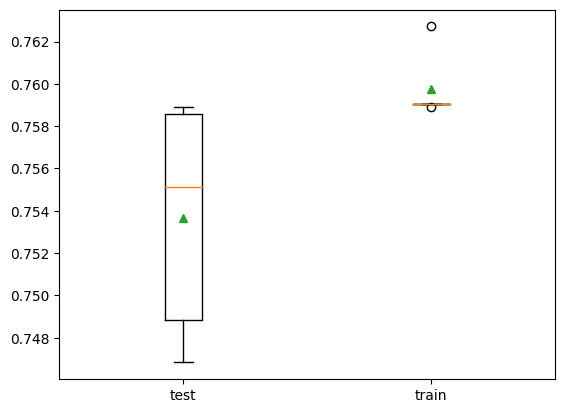

In [ ]:
pipeline = imbpipeline([
    ('preprocessor', One_Hot_Encoding),
    ('scaler', StandardScaler()),
    (('sample',SMOTE(random_state=42, k_neighbors=3))),
    ('log_reg', LogisticRegression(max_iter=3000,class_weight= {0: 1, 1: 0.75}, penalty= 'l2', solver= 'saga'))
])


scores = cross_validate(pipeline, X_train, y_train, return_train_score="f1_score",cv=5)

test_accuarcy=scores["test_score"]
train_accuarcy=scores["train_score"]



plt.boxplot([test_accuarcy, train_accuarcy], labels=["test", "train"], showmeans=True)
plt.show()

pipeline.fit(X_train,y_train)
y_hat=pipeline.predict(X_test)


from sklearn.metrics import accuracy_score


In [ ]:
f1_Score=f1_score(y_test, y_hat)
accuarcy_Score=accuracy_score(y_test, y_hat)
print("F1 Score : ",f1_Score,",","Accuarcy Score : ",accuarcy_Score)

F1 Score :  0.7016921397379913 , Accuarcy Score :  0.7662781995081792
